
# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### i used No-Show appointments dataset and exploring which factors for us to know that patients will show up for thier appointments

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head(5)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No


## patientID and appointmentID are specific data and useless in analysis so they will be dropped

In [4]:
df.drop(columns = ['PatientId','AppointmentID'],inplace=True)

In [5]:
df.describe()

Age    Scholarship   Hipertension       Diabetes  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean       37.088874       0.098266       0.197246       0.071865   
std        23.110205       0.297675       0.397921       0.258265   
min        -1.000000       0.000000       0.000000       0.000000   
25%        18.000000       0.000000       0.000000       0.000000   
50%        37.000000       0.000000       0.000000       0.000000   
75%        55.000000       0.000000       0.000000       0.000000   
max       115.000000       1.000000       1.000000       1.000000   

          Alcoholism        Handcap   SMS_received  
count  110527.000000  110527.000000  110527.000000  
mean        0.030400       0.022248       0.321026  
std         0.171686       0.161543       0.466873  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       1.000000  
max         1.000000       4.000000       1.000000

# get all columns be in lowercase and changing No-show column to no_show

In [6]:
df.rename(lambda x:x.lower(),axis=1,inplace=True)

In [7]:
df.rename({'no-show':'no_show'},axis=1,inplace=True);

# getting most important components(hour,day and month) from scheduledday and dropping it 
# getting most important components(day and month) from appointment and dropping it

In [8]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'],format="%Y-%m-%dT%H:%M:%SZ");

In [9]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'],format="%Y-%m-%dT%H:%M:%SZ");

In [10]:
df['sch_hour'] = df['scheduledday'].dt.hour

In [11]:
df['sch_day'] = df['scheduledday'].dt.day

In [12]:
df['sch_month'] = df['scheduledday'].dt.month

In [13]:
df['app_day'] = df['appointmentday'].dt.day

In [14]:
df['app_month'] = df['appointmentday'].dt.month

In [15]:
df.drop('scheduledday',inplace=True,axis=1)

In [16]:
df.drop('appointmentday',inplace=True,axis=1)

In [17]:
df.tail(5)

gender  age neighbourhood  scholarship  hipertension  diabetes  \
110522      F   56   MARIA ORTIZ            0             0         0   
110523      F   51   MARIA ORTIZ            0             0         0   
110524      F   21   MARIA ORTIZ            0             0         0   
110525      F   38   MARIA ORTIZ            0             0         0   
110526      F   54   MARIA ORTIZ            0             0         0   

        alcoholism  handcap  sms_received no_show  sch_hour  sch_day  \
110522           0        0             1      No         9        3   
110523           0        0             1      No         7        3   
110524           0        0             1      No        16       27   
110525           0        0             1      No        15       27   
110526           0        0             1      No        13       27   

        sch_month  app_day  app_month  
110522          5        7          6  
110523          5        7          6  
110524          4        7          6  
110525          4        7          6  
110526          4        7          6

# dropping all cells of age lower than or equal 0 (unreasonable)

In [18]:
df.drop(df[df['age']<=0].index,axis=0,inplace=True)

In [19]:
df.shape

(106987, 15)

## no. of samples are suffient in the dataset but no. of columns are less and noninformative 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 15 columns):
gender           106987 non-null object
age              106987 non-null int64
neighbourhood    106987 non-null object
scholarship      106987 non-null int64
hipertension     106987 non-null int64
diabetes         106987 non-null int64
alcoholism       106987 non-null int64
handcap          106987 non-null int64
sms_received     106987 non-null int64
no_show          106987 non-null object
sch_hour         106987 non-null int64
sch_day          106987 non-null int64
sch_month        106987 non-null int64
app_day          106987 non-null int64
app_month        106987 non-null int64
dtypes: int64(12), object(3)
memory usage: 13.1+ MB


## these data are less null values and results are more accurate in analysis since there are no added values from analyist that affect on analysis

<a id='eda'></a>
## Exploratory Data Analysis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a284815c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7a29358f98>]], dtype=object)

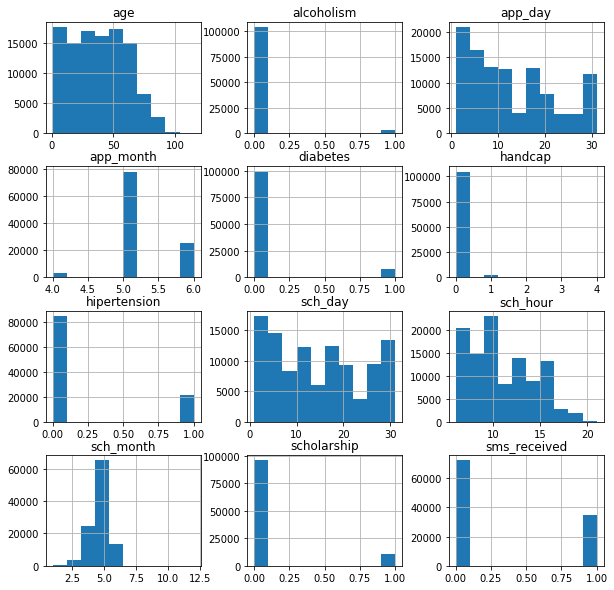

In [21]:
df.hist(figsize=(10,10))

In [22]:
attended = df[df['no_show'] == 'Yes']
notattended = df[df['no_show'] == 'No']

# there are some factors that aren't good at exploration in analysis after watching out what could do in analysis which are (scholarship,	hipertension,	diabetes,	alcoholism,  sms_received  and	handcap)

# --------------------------------------------------------------------------
# Question
## is gender is informative ?

# Gender factor
### no_show generally doesn't depend on gender according to following statistics and if it happens females are more discipline than males

In [23]:
df.groupby('no_show')['gender'].value_counts()

no_show  gender
No       F         55843
         M         29464
Yes      F         14275
         M          7405
Name: gender, dtype: int64

Text(0,0.5,'iters')

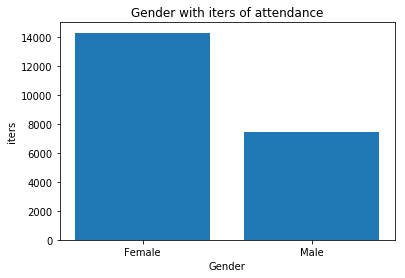

In [24]:
labels_gender=['Female','Male']
values_att_gender=attended['gender'].value_counts()
plt.bar(labels_gender,values_att_gender)
plt.title("Gender with iters of attendance")
plt.xlabel("Gender")
plt.ylabel("iters")

### chart depicts that females attended more than males

Text(0,0.5,'iters')

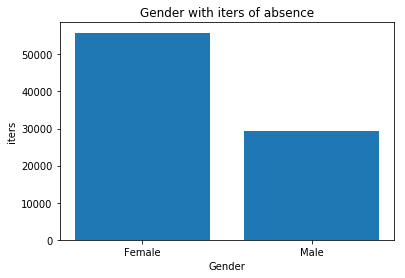

In [25]:
labels_gender=['Female','Male']
values_notatt_gender=notattended['gender'].value_counts()
plt.bar(labels_gender,values_notatt_gender)
plt.title("Gender with iters of absence")
plt.xlabel("Gender")
plt.ylabel("iters")

### chart depicts that females notattended more than males

# Answer
## gender is pessimistic in detecting attendance of case.

# --------------------------------------------------------------------------------
## but at all, females more than males in the dataset according to upper statistic in this section

# Question
## is age is a milestone in predicting attendance of case?
# ------------------------------------------------------------------------

# Age factor
### most age interval between [20:56] and ages is skewed right and most attendance is done between [20:40] and most absence is done between [40:56]

In [26]:
df['age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

Text(0.5,1,'histogram of attended age ')

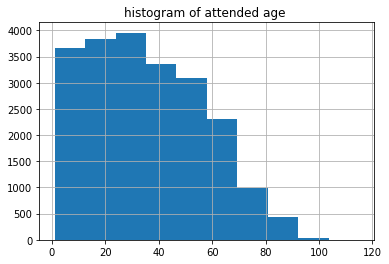

In [60]:
attended['age'].hist()
plt.title("histogram of attended age ")

## ages between 20 and 40 more discipline than others

Text(0.5,1,'histogram of notattended age ')

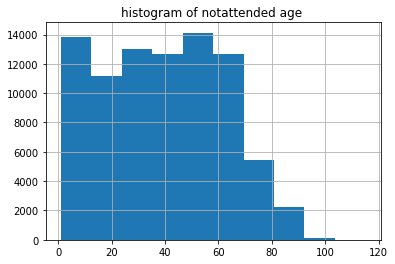

In [61]:
notattended['age'].hist()
plt.title("histogram of notattended age ")

## ages under 20 and between 40 and 68 not attended in more cases

# Answer
## age is informative to know attendance of case

# ------------------------------------------------------------------------------------

# Question:
## is date of appointment is important to cases ?

# appointments months and days
### no observable information can be extracted from them

Text(0.5,1,'histogram of attended appointed day show-up')

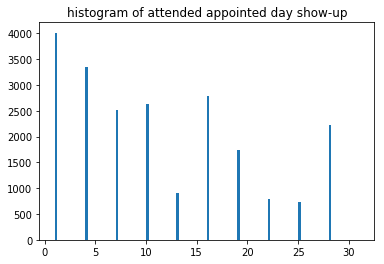

In [73]:
attended['app_day'].hist(width=.25 , grid=False)
plt.title("histogram of attended appointed day show-up")

Text(0.5,1,'histogram of notattended appointed day show-up')

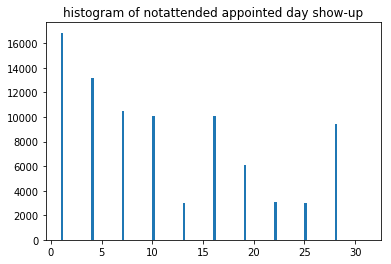

In [72]:
notattended['app_day'].hist(width=.25 , grid=False)
plt.title("histogram of notattended appointed day show-up")

Text(0.5,1,'histogram of attended appointed month show-up')

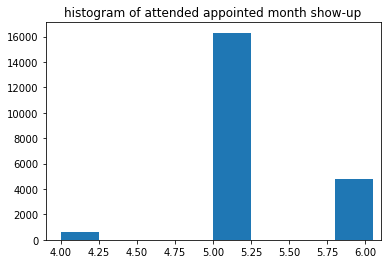

In [70]:
attended['app_month'].hist(width=.25 , grid=False)
plt.title("histogram of attended appointed month show-up")

Text(0.5,1,'histogram of notattended appointed month show-up')

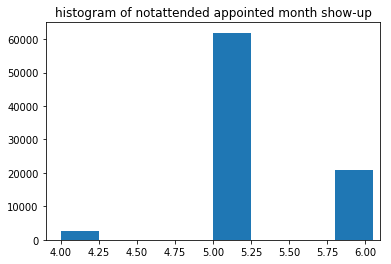

In [71]:
notattended['app_month'].hist(width=.25 , grid = False)
plt.title("histogram of notattended appointed month show-up")

# Answer
## appointment isn't important to cases (not day or even month)
# -----------------------------------------------------------------------------------

# Question
## is scheduling time affect on attendance ?

# scheduling day
### according to scheduled day most schedule at first and last days but attendence in last days more than first days with respect to notattendance

Text(0.5,1,'histogram of attended scheduled day show-up')

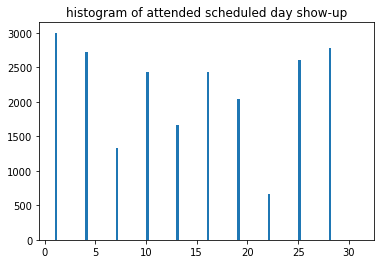

In [74]:
attended['sch_day'].hist(width=.25 , grid=False)
plt.title("histogram of attended scheduled day show-up")

Text(0.5,1,'histogram of notattended scheduled day show-up')

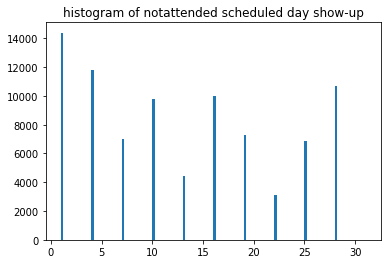

In [75]:
notattended['sch_day'].hist(width=.25 , grid=False)
plt.title("histogram of notattended scheduled day show-up")

# scheduling month
### is skewed to left and 3rd moth (march) attendance more than its peers according to notattendance

Text(0.5,1,'histogram of attended scheduled month show-up')

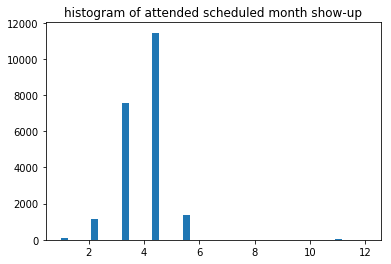

In [76]:
attended['sch_month'].hist(width=.25 , grid=False)
plt.title("histogram of attended scheduled month show-up")

Text(0.5,1,'histogram of notattended scheduled month show-up')

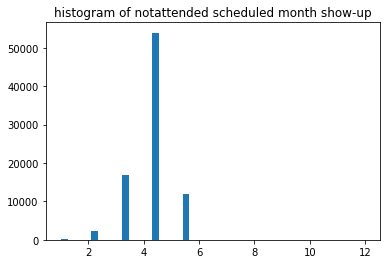

In [77]:
notattended['sch_month'].hist(width=.25 , grid=False)
plt.title("histogram of notattended scheduled month show-up")

# sch_hour factor
### graph is skewed right and most scheduling is done in earlier hours than late hours 

Text(0.5,1,'histogram of attended scheduled hour show-up')

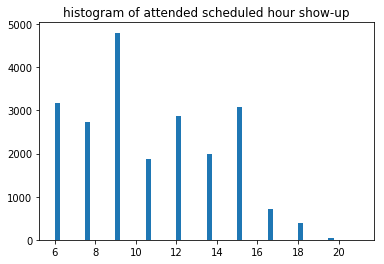

In [78]:
attended['sch_hour'].hist(width=.25 , grid=False)
plt.title("histogram of attended scheduled hour show-up")

Text(0.5,1,'histogram of notattended scheduled hour show-up')

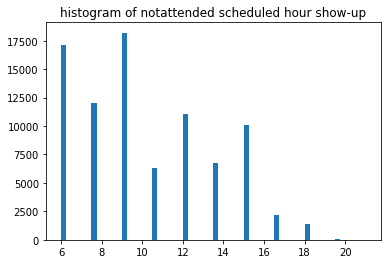

In [79]:
notattended['sch_hour'].hist(width=.25 , grid=False)
plt.title("histogram of notattended scheduled hour show-up")

# Answer
## scheduling date is more informative espcially in (hour and month) which they show distinct distribution in attendance
# ---------------------------------------------------------------------------

# neighbourhood factor
### it noticed from the most sessions(biggest 10) that :--->
### some neighbourhoods more than others in attendance like(ITARARÉ, JESUS DE NAZARETH and CARATOÍRA).
### on the other side, some neighbourhoods more than others in absence like(JARDIM DA PENHA,RESISTÊNCIA and  SANTA MARTHA ).

In [39]:
df['neighbourhood'].value_counts()[:10]

JARDIM CAMBURI       7586
MARIA ORTIZ          5563
RESISTÊNCIA          4235
JARDIM DA PENHA      3851
ITARARÉ              3412
CENTRO               3282
SANTA MARTHA         3041
TABUAZEIRO           3019
JESUS DE NAZARETH    2719
BONFIM               2700
Name: neighbourhood, dtype: int64

In [40]:
attended['neighbourhood'].value_counts()[:10]

JARDIM CAMBURI       1432
MARIA ORTIZ          1194
ITARARÉ               898
RESISTÊNCIA           875
CENTRO                692
JESUS DE NAZARETH     676
JARDIM DA PENHA       627
CARATOÍRA             586
TABUAZEIRO            552
BONFIM                537
Name: neighbourhood, dtype: int64

In [41]:
notattended['neighbourhood'].value_counts()[:10]

JARDIM CAMBURI     6154
MARIA ORTIZ        4369
RESISTÊNCIA        3360
JARDIM DA PENHA    3224
CENTRO             2590
SANTA MARTHA       2552
ITARARÉ            2514
TABUAZEIRO         2467
SANTO ANTÔNIO      2198
BONFIM             2163
Name: neighbourhood, dtype: int64

# before doing last changes i could summarize my data into following factors that could be useful in predicting which factors are important

In [42]:
df.head(1)

gender  age    neighbourhood  scholarship  hipertension  diabetes  \
0      F   62  JARDIM DA PENHA            0             1         0   

   alcoholism  handcap  sms_received no_show  sch_hour  sch_day  sch_month  \
0           0        0             0      No        18       29          4   

   app_day  app_month  
0       29          4

In [43]:
df.drop(columns = ['sms_received','handcap','alcoholism','diabetes','hipertension','scholarship'],inplace=True)

In [44]:
df.head()

gender  age      neighbourhood no_show  sch_hour  sch_day  sch_month  \
0      F   62    JARDIM DA PENHA      No        18       29          4   
1      M   56    JARDIM DA PENHA      No        16       29          4   
2      F   62      MATA DA PRAIA      No        16       29          4   
3      F    8  PONTAL DE CAMBURI      No        17       29          4   
4      F   56    JARDIM DA PENHA      No        16       29          4   

   app_day  app_month  
0       29          4  
1       29          4  
2       29          4  
3       29          4  
4       29          4

# Conclusions

### age, neighbourhood and components of datetime(independant variables) are most important than other factors where no_show (dependant variable) has No value more than Yes value in big difference so most of variables weren't clear in analysis to show its role in exploration

### i think there are more factors than given should be available like location of clinic or hospital, diagnosis of case and way of reservation if there are more than one way of reservation etc...

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0